In [1]:
def featureExtraction(fileDir, minCount, maxCount, leftLight):
    userHp1 = []
    userLp1 = []
    userLhpl1 = []
    userLlpl1 = []
    userHpl1 = []
    userLpl1 = []
    userLhpg1 = []
    userLlpg1 = []
    userRhpg1 = []
    userRlpg1 = []
    userBlink1 = []
    userNotBlink1 = []
    
    for count in range(minCount, maxCount):
        file = open(fileDir + '/file' + str(count) + '-' + str(leftLight) + '.txt', 'r')
        x = file.read()
        file.close()
    
        x = x.split(',')
    
        data1 = []
    
        for index, item in enumerate(x):
            data1.append(float(item))
        
        for index, item in enumerate(x):
            if(index != len(data1) -1):
                data1[index] = data1[index + 1]
            
        temp = 0
        index = 0

        start1 = []
        middle1 = []
        finish1 = []

        for i in range(0, len(data1)):
            if((temp + 150 < i) and (data1[i] > 100)):
                for j in range(i, 0, -1):
                    if(data1[j] <= 0):
                        start1.append(j)
                        break
                
                for j in range(start1[index] + 1, len(data1)):
                    if(data1[j] <= 0):
                        middle1.append(j)
                        break
                
                for j in range(middle1[index] + 1, len(data1)):
                    if(data1[j] >= 0):
                        finish1.append(j)
                        break
                
                i = finish1[index]
                index = index + 1
                temp = i
   
        temp = 0
    
        hp1 = []
        lp1 = []
        lhpl1 = []
        llpl1 = []
        hpl1 = []
        lpl1 = []
        lhpg1 = []
        llpg1 = []
        rhpg1 = []
        rlpg1 = []
        blink1 = []
        notBlink1 = []
    
        index = 0;
    
        for i in range(start1[0], finish1[len(finish1) - 1]):
            hp1.append(0)
            lp1.append(0)
            lhpl1.append(0)
            llpl1.append(0)
            hpl1.append(0)
            lpl1.append(0)
            lhpg1.append(0)
            llpg1.append(0)
            rhpg1.append(0)
            rlpg1.append(0)
            blink1.append(0)
            notBlink1.append(0)
    
            for j in range(start1[index], finish1[index]):
                if(hp1[index] < data1[j]):
                    hp1[index] = data1[j]
                    lhpl1[index] = j - start1[index]
    
            for j in range(start1[index], finish1[index]):
                if(hp1[index] > data1[j]):
                    lp1[index] = data1[j]
                    llpl1[index] = j - start1[index]
            
            hpl1[index] = middle1[index] - start1[index]
            lpl1[index] = finish1[index] - middle1[index]
    
            lhpg1[index] = hp1[index] / lhpl1[index]
            llpg1[index] = lp1[index] / llpl1[index]
            rhpg1[index] = hp1[index] / (hpl1[index] - lhpg1[index])
            rlpg1[index] = lp1[index] / (lpl1[index] - llpl1[index])
    
            index = index + 1
    
            if(len(start1) == index):
                break
    
            i = start1[index]
        
        index = 0;
        
        for i in range(0, len(finish1)):
            blink1[i] = finish1[i] - start1[i]

        for i in range(0, len(finish1) - 1):
            notBlink1[i] = start1[i + 1] - finish1[i]
        
        for i in range(0, len(finish1)):
            userHp1.append(hp1[i])
            userLp1.append(lp1[i])
            userLhpl1.append(lhpl1[i])
            userLlpl1.append(llpl1[i])
            userHpl1.append(hpl1[i])
            userLpl1.append(lpl1[i])
            userLhpg1.append(lhpg1[i])
            userLlpg1.append(llpg1[i])
            userRhpg1.append(rhpg1[i])
            userRlpg1.append(rlpg1[i])
            userBlink1.append(blink1[i])
            userNotBlink1.append(notBlink1[i])
            
    return userHp1, userLp1, userLhpl1, userLlpl1, userHpl1, userLpl1, userLhpg1, userLlpg1, userRhpg1, userRlpg1, userBlink1, userNotBlink1

In [2]:
user1Data  = []
user1Label = []

In [3]:
userHp1, userLp1, userLhpl1, userLlpl1, userHpl1, userLpl1, userLhpg1, userLlpg1, userRhpg1, userRlpg1, userBlink1, userNotBlink1 = featureExtraction('C:/EOGData/user1', 0, 49, 1)

In [4]:
userHp2, userLp2, userLhpl2, userLlpl2, userHpl2, userLpl2, userLhpg2, userLlpg2, userRhpg2, userRlpg2, userBlink2, userNotBlink2 = featureExtraction('C:/EOGData/user1', 0, 49, 2)

In [5]:
sum = len(userHp1) +len(userHp2)

In [6]:
userHp1 = userHp1 + userHp2
userLp1 = userLp1 + userLp2
userLhpl1 = userLhpl1 + userLhpl2
userLlpl1 = userLlpl1 + userLlpl2
userHpl1 = userHpl1 + userHpl2
userLpl1 = userLpl1 + userLpl2
userLhpg1 = userLhpg1 + userLhpg2
userLlpg1 = userLlpg1 + userLlpg2
userRhpg1 = userRhpg1 + userRhpg2
userRlpg1 = userRlpg1 + userRlpg2
userBlink1 = userBlink1 + userBlink2
userNotBlink1 = userNotBlink1 + userNotBlink2

In [7]:
for i in range(0, sum):
    user1Data.append([userHp1[i], userLp1[i], userLhpl1[i], userLlpl1[i], userHpl1[i], userLpl1[i], userLhpg1[i], userLlpg1[i], userRhpg1[i], userRlpg1[i], userBlink1[i], userNotBlink1[i]])
    user1Label.append(0)

In [8]:
user2Data  = []
user2Label = []

In [9]:
userHp1, userLp1, userLhpl1, userLlpl1, userHpl1, userLpl1, userLhpg1, userLlpg1, userRhpg1, userRlpg1, userBlink1, userNotBlink1 = featureExtraction('C:/EOGData/user2', 0, 49, 1)

In [10]:
userHp2, userLp2, userLhpl2, userLlpl2, userHpl2, userLpl2, userLhpg2, userLlpg2, userRhpg2, userRlpg2, userBlink2, userNotBlink2 = featureExtraction('C:/EOGData/user2', 0, 49, 2)

In [11]:
sum = len(userHp1) +len(userHp2)

In [12]:
userHp1 = userHp1 + userHp2
userLp1 = userLp1 + userLp2
userLhpl1 = userLhpl1 + userLhpl2
userLlpl1 = userLlpl1 + userLlpl2
userHpl1 = userHpl1 + userHpl2
userLpl1 = userLpl1 + userLpl2
userLhpg1 = userLhpg1 + userLhpg2
userLlpg1 = userLlpg1 + userLlpg2
userRhpg1 = userRhpg1 + userRhpg2
userRlpg1 = userRlpg1 + userRlpg2
userBlink1 = userBlink1 + userBlink2
userNotBlink1 = userNotBlink1 + userNotBlink2

In [13]:
for i in range(0, sum):
    user2Data.append([userHp1[i], userLp1[i], userLhpl1[i], userLlpl1[i], userHpl1[i], userLpl1[i], userLhpg1[i], userLlpg1[i], userRhpg1[i], userRlpg1[i], userBlink1[i], userNotBlink1[i]])
    user2Label.append(1)

In [14]:
user3Data  = []
user3Label = []

In [15]:
userHp1, userLp1, userLhpl1, userLlpl1, userHpl1, userLpl1, userLhpg1, userLlpg1, userRhpg1, userRlpg1, userBlink1, userNotBlink1 = featureExtraction('C:/EOGData/artifact/doridori', 0, 3, 1)

In [16]:
userHp2, userLp2, userLhpl2, userLlpl2, userHpl2, userLpl2, userLhpg2, userLlpg2, userRhpg2, userRlpg2, userBlink2, userNotBlink2 = featureExtraction('C:/EOGData/artifact/doridori', 0, 3, 2)

In [17]:
sum = len(userHp1) +len(userHp2)

In [18]:
userHp1 = userHp1 + userHp2
userLp1 = userLp1 + userLp2
userLhpl1 = userLhpl1 + userLhpl2
userLlpl1 = userLlpl1 + userLlpl2
userHpl1 = userHpl1 + userHpl2
userLpl1 = userLpl1 + userLpl2
userLhpg1 = userLhpg1 + userLhpg2
userLlpg1 = userLlpg1 + userLlpg2
userRhpg1 = userRhpg1 + userRhpg2
userRlpg1 = userRlpg1 + userRlpg2
userBlink1 = userBlink1 + userBlink2
userNotBlink1 = userNotBlink1 + userNotBlink2

In [19]:
for i in range(0, sum):
    user3Data.append([userHp1[i], userLp1[i], userLhpl1[i], userLlpl1[i], userHpl1[i], userLpl1[i], userLhpg1[i], userLlpg1[i], userRhpg1[i], userRlpg1[i], userBlink1[i], userNotBlink1[i]])
    user3Label.append(2)

In [20]:
import numpy as np

In [21]:
user1Data = np.array(user1Data)
user2Data = np.array(user2Data)
user3Data = np.array(user3Data)

user1Label = np.array(user1Label)
user2Label = np.array(user2Label)
user3Label = np.array(user3Label)

In [22]:
len(user1Data)

841

In [23]:
len(user2Data)

1516

In [24]:
len(user3Data)

882

In [25]:
data = np.concatenate((user1Data, user2Data, user3Data), axis=0)

In [26]:
len(data)

3239

In [27]:
label = np.concatenate((user1Label, user2Label, user3Label), axis=0)

In [28]:
len(label)

3239

In [29]:
s = np.arange(data.shape[0])
np.random.shuffle(s)

In [30]:
data = data[s]
label = label[s]

In [31]:
label

array([0, 1, 1, ..., 2, 2, 0])

In [32]:
tempLabel = []
testLabel = label[2600:]

In [33]:
for i in range(0, len(label)):
    if(label[i] == 0):
        tempLabel.append([1, 0, 0])
    elif(label[i] == 1):
        tempLabel.append([0, 1, 0])
    else:
        tempLabel.append([0, 0, 1])

In [34]:
label = tempLabel

In [35]:
label = np.array(label)

In [36]:
train_data = data[:2000]
val_data = data[2000:2600]
test_data = data[2600:]

train_label = label[:2000]
val_label = label[2000:2600]
test_label = label[2600:]

In [37]:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std

val_data -= mean
val_data /= std

test_data -= mean
test_data /= std

In [38]:
from keras import models
from keras import layers
from keras import regularizers
from keras import optimizers

Using TensorFlow backend.
C:\Users\HongGi-hyeon\anaconda3\envs\test_tensor\lib\site-packages\tensorflow\python\framework\dtypes.py:493: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\HongGi-hyeon\anaconda3\envs\test_tensor\lib\site-packages\tensorflow\python\framework\dtypes.py:494: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\HongGi-hyeon\anaconda3\envs\test_tensor\lib\site-packages\tensorflow\python\framework\dtypes.py:495: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

import pandas as pd
from sklearn.metrics import auc
from sklearn.metrics import roc_curve, roc_auc_score


import matplotlib as mpl
import matplotlib.pyplot as plt

In [40]:
def build_model(actiFunc, lossFunc, hidden, node, dropout):
    model = models.Sequential()
    
    model.add(layers.Dense(node[0], activation=actiFunc, input_shape=(12, )))
    model.add(layers.Dropout(dropout))
    
    if(hidden == 2):
        model.add(layers.Dense(node[1], activation=actiFunc))
        model.add(layers.Dropout(dropout))
    
    if(hidden == 3):
        model.add(layers.Dense(node[1], activation=actiFunc))
        model.add(layers.Dropout(dropout))
        model.add(layers.Dense(node[2], activation=actiFunc))
        model.add(layers.Dropout(dropout))
        
    if(hidden == 4):
        model.add(layers.Dense(node[1], activation=actiFunc))
        model.add(layers.Dropout(dropout))
        model.add(layers.Dense(node[2], activation=actiFunc))
        model.add(layers.Dropout(dropout))
        model.add(layers.Dense(node[3], activation=actiFunc))
        model.add(layers.Dropout(dropout))
    
    model.add(layers.Dense(3, activation='softmax'))
    model.compile(optimizer='rmsprop', loss=lossFunc, metrics=['accuracy'])
    return model

Activation: relu   Loss: categorical_crossentropy   HiddenLayer: 4   Node:[ 4 , 4 , 4 ]  BatchSize: 512   Dropout: 0
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 4)                 52        
_________________________________________________________________
dropout_1 (Dropout)          (None, 4)                 0         
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 20        
_________________________________________________________________
dropout_2 (Dropout)          (None, 4)                 0         
_________________________________________________________________
dense_3 (Dense)              (None, 4)                 20        
_________________________________________________________________
dropout_3 (Dropout)          (None, 4)                 0         
_________________________

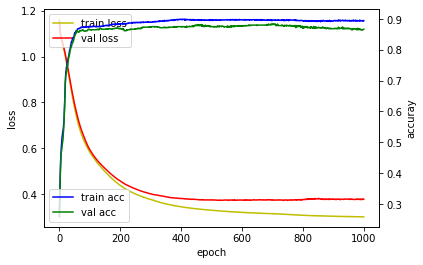

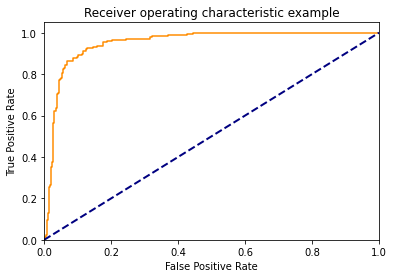


fpr : [0.         0.0021692  0.0021692  0.00650759 0.00650759 0.00867679
 0.00867679 0.01084599 0.01084599 0.01301518 0.01301518 0.01518438
 0.01518438 0.01735358 0.01735358 0.01952278 0.01952278 0.02169197
 0.02169197 0.02386117 0.02386117 0.02603037 0.02603037 0.02819957
 0.02819957 0.03036876 0.03036876 0.03470716 0.03470716 0.03687636
 0.03687636 0.03904555 0.03904555 0.04121475 0.04121475 0.04338395
 0.04338395 0.04555315 0.04555315 0.04772234 0.04772234 0.04989154
 0.04989154 0.05206074 0.05206074 0.05639913 0.05639913 0.05856833
 0.05856833 0.06290672 0.06290672 0.06724512 0.06724512 0.06941432
 0.06941432 0.0845987  0.0845987  0.0867679  0.0867679  0.09761388
 0.09761388 0.09978308 0.09978308 0.10195228 0.10195228 0.11279826
 0.11279826 0.11713666 0.11713666 0.12364425 0.12364425 0.12798265
 0.12798265 0.14533623 0.14533623 0.15835141 0.15835141 0.17570499
 0.17570499 0.18872017 0.18872017 0.20173536 0.20173536 0.20607375
 0.24295011 0.24295011 0.31453362 0.31453362 0.32104121

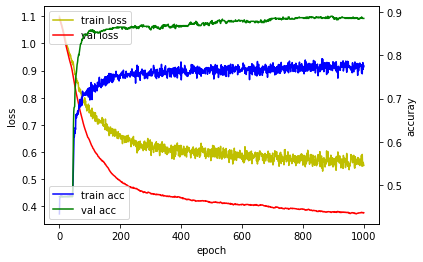

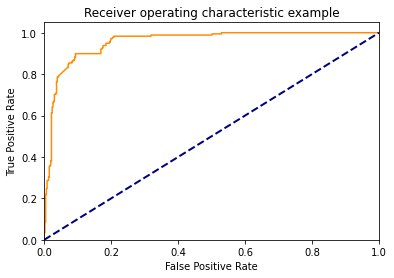


fpr : [0.         0.         0.         0.0021692  0.0021692  0.00433839
 0.00433839 0.00650759 0.00650759 0.00867679 0.00867679 0.01301518
 0.01301518 0.01518438 0.01518438 0.01735358 0.01735358 0.01952278
 0.01952278 0.02169197 0.02169197 0.02386117 0.02386117 0.02603037
 0.02603037 0.02819957 0.02819957 0.03036876 0.03036876 0.03470716
 0.03470716 0.03687636 0.03687636 0.03904555 0.03904555 0.04338395
 0.04338395 0.06941432 0.07158351 0.07158351 0.07375271 0.07375271
 0.0824295  0.0824295  0.0845987  0.0845987  0.08893709 0.08893709
 0.09110629 0.09110629 0.09327549 0.09327549 0.1691974  0.1691974
 0.17353579 0.17353579 0.17570499 0.17570499 0.18438178 0.18438178
 0.19522777 0.19522777 0.19739696 0.19739696 0.19956616 0.19956616
 0.20390456 0.20390456 0.20824295 0.20824295 0.31887202 0.31887202
 0.38177874 0.38611714 0.5010846  0.5010846  0.52928416 0.52928416
 0.56182213 0.56616052 0.67678959 0.68112798 0.77223427 0.77657267
 0.87635575 0.88069414 1.        ]

tpr : [0.         0.

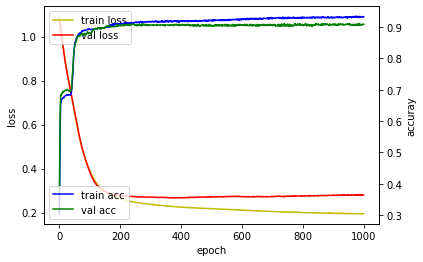

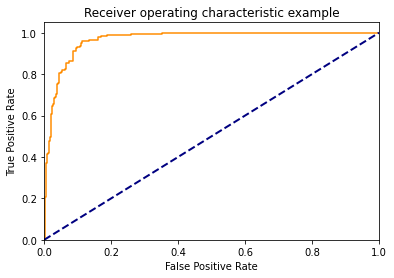


fpr : [0.         0.0021692  0.0021692  0.00433839 0.00433839 0.00650759
 0.00650759 0.00867679 0.00867679 0.01084599 0.01084599 0.01301518
 0.01301518 0.01735358 0.01735358 0.02169197 0.02169197 0.02386117
 0.02386117 0.02603037 0.02603037 0.02819957 0.02819957 0.03036876
 0.03036876 0.03253796 0.03253796 0.03470716 0.03470716 0.03687636
 0.03687636 0.03904555 0.03904555 0.04121475 0.04121475 0.04338395
 0.04338395 0.04555315 0.04555315 0.04989154 0.04989154 0.05422993
 0.05422993 0.06290672 0.06290672 0.06507592 0.06507592 0.07375271
 0.07375271 0.0867679  0.0867679  0.09544469 0.09544469 0.09761388
 0.09761388 0.10629067 0.10629067 0.11062907 0.11062907 0.11279826
 0.11279826 0.13449024 0.13449024 0.16052061 0.16052061 0.1691974
 0.1691974  0.18872017 0.18872017 0.25813449 0.25813449 0.35140998
 0.35140998 0.35791757 0.36225597 0.5791757  0.5835141  0.77657267
 0.78091106 0.79392625 0.79826464 0.95878525 0.96312364 1.        ]

tpr : [0.         0.         0.20786517 0.20786517 0.2

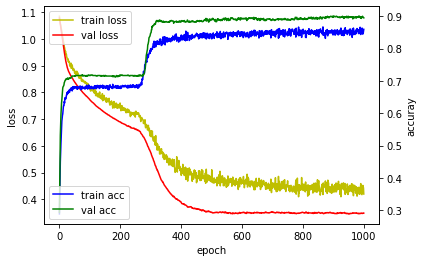

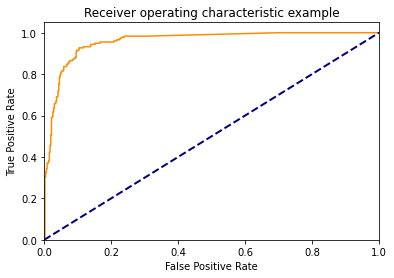


fpr : [0.         0.0021692  0.0021692  0.00433839 0.00433839 0.00650759
 0.00650759 0.00867679 0.00867679 0.01301518 0.01301518 0.01518438
 0.01518438 0.01735358 0.01735358 0.01952278 0.01952278 0.02169197
 0.02169197 0.02386117 0.02386117 0.02603037 0.02603037 0.02819957
 0.02819957 0.03036876 0.03036876 0.03470716 0.03470716 0.03687636
 0.03687636 0.04121475 0.04121475 0.04338395 0.04338395 0.04555315
 0.04555315 0.04772234 0.04772234 0.04989154 0.04989154 0.05206074
 0.05206074 0.05639913 0.05639913 0.05856833 0.05856833 0.06724512
 0.06724512 0.07158351 0.07158351 0.07375271 0.07375271 0.07592191
 0.07592191 0.0845987  0.0845987  0.08893709 0.08893709 0.09327549
 0.09327549 0.09544469 0.09544469 0.09761388 0.09761388 0.10412148
 0.10412148 0.11713666 0.11713666 0.13882863 0.13882863 0.15184382
 0.15184382 0.1670282  0.1670282  0.20824295 0.20824295 0.21691974
 0.21691974 0.22559653 0.22559653 0.22993492 0.22993492 0.23861171
 0.23861171 0.29284165 0.29718004 0.70281996 0.9197397 

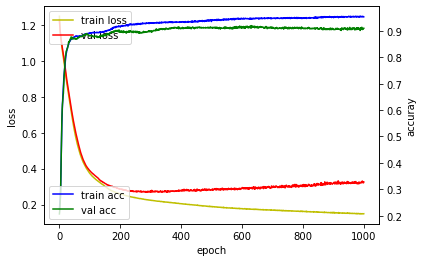

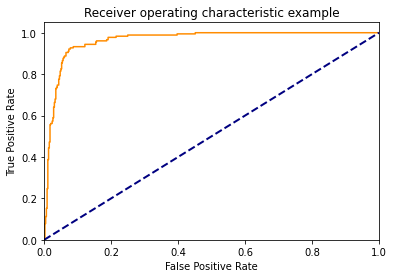


fpr : [0.         0.0021692  0.0021692  0.00433839 0.00433839 0.00650759
 0.00650759 0.00867679 0.00867679 0.01084599 0.01084599 0.01301518
 0.01301518 0.01518438 0.01518438 0.01735358 0.01735358 0.01952278
 0.01952278 0.02386117 0.02386117 0.02603037 0.02603037 0.02819957
 0.02819957 0.03036876 0.03036876 0.03253796 0.03253796 0.03470716
 0.03470716 0.03687636 0.03687636 0.03904555 0.03904555 0.04338395
 0.04338395 0.04555315 0.04555315 0.04772234 0.04772234 0.04989154
 0.04989154 0.05206074 0.05206074 0.05422993 0.05422993 0.05639913
 0.05639913 0.05856833 0.05856833 0.06073753 0.06073753 0.06507592
 0.06507592 0.07158351 0.07158351 0.07375271 0.07375271 0.07809111
 0.07809111 0.0867679  0.0867679  0.12147505 0.12147505 0.15401302
 0.15401302 0.15618221 0.15618221 0.18655098 0.18655098 0.19088937
 0.19088937 0.21475054 0.21475054 0.2494577  0.2494577  0.39696312
 0.39696312 0.40563991 0.40997831 0.44034707 0.44468547 0.45119306
 0.45119306 0.4989154  0.5032538  0.52494577 0.52928416

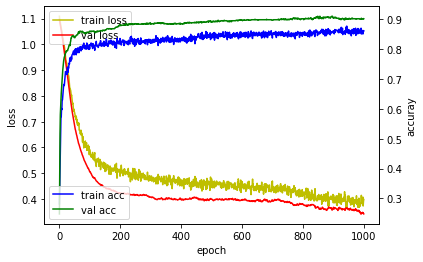

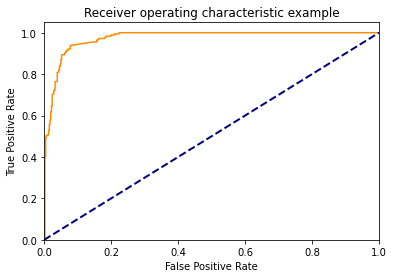


fpr : [0.         0.0021692  0.0021692  0.00433839 0.00433839 0.00650759
 0.00650759 0.01301518 0.01301518 0.01518438 0.01518438 0.01735358
 0.01735358 0.01952278 0.01952278 0.02169197 0.02169197 0.02386117
 0.02386117 0.02819957 0.02819957 0.03036876 0.03036876 0.03253796
 0.03253796 0.03904555 0.03904555 0.04338395 0.04338395 0.04555315
 0.04555315 0.04772234 0.04772234 0.04989154 0.04989154 0.05206074
 0.05206074 0.06073753 0.06073753 0.06290672 0.06290672 0.06507592
 0.06507592 0.06724512 0.06724512 0.07158351 0.07158351 0.07809111
 0.07809111 0.14316703 0.15618221 0.15618221 0.15835141 0.15835141
 0.1626898  0.1626898  0.18004338 0.18004338 0.18438178 0.18438178
 0.19956616 0.19956616 0.21041215 0.21041215 0.22342733 0.22342733
 0.23644252 0.70932755 0.95661605 0.96095445 1.        ]

tpr : [0.         0.         0.3988764  0.3988764  0.49438202 0.49438202
 0.50561798 0.50561798 0.52808989 0.52808989 0.55617978 0.55617978
 0.57865169 0.57865169 0.61797753 0.61797753 0.64606742 0.

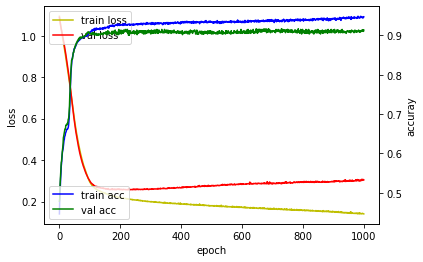

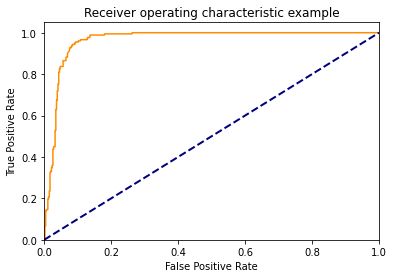


fpr : [0.         0.0021692  0.0021692  0.00433839 0.00433839 0.00650759
 0.00650759 0.01084599 0.01084599 0.01301518 0.01301518 0.01518438
 0.01518438 0.01735358 0.01735358 0.01952278 0.01952278 0.02169197
 0.02169197 0.02386117 0.02386117 0.02603037 0.02603037 0.02819957
 0.02819957 0.03253796 0.03253796 0.03470716 0.03470716 0.03687636
 0.03687636 0.03904555 0.03904555 0.04121475 0.04121475 0.04338395
 0.04338395 0.04555315 0.04555315 0.04772234 0.04772234 0.05639913
 0.05639913 0.06507592 0.06507592 0.06941432 0.06941432 0.07592191
 0.07592191 0.0802603  0.0802603  0.0824295  0.0824295  0.0845987
 0.0845987  0.09110629 0.09110629 0.09327549 0.09327549 0.10195228
 0.10195228 0.10845987 0.10845987 0.12798265 0.12798265 0.13015184
 0.13015184 0.13665944 0.13665944 0.18004338 0.18004338 0.26247289
 0.26247289 0.42299349 0.42733189 0.45119306 0.45553145 0.5856833
 0.59002169 0.78524946 0.78958785 0.79826464 0.80260304 0.80477223
 0.80911063 0.81344902 0.81995662 0.82863341 0.8329718  0

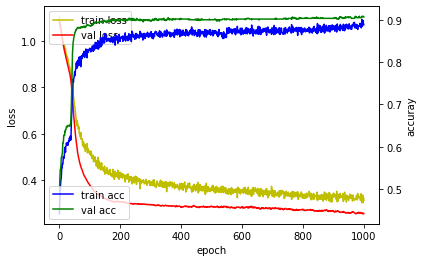

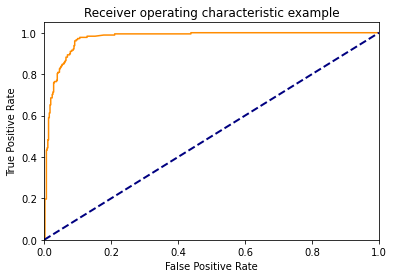


fpr : [0.         0.0021692  0.0021692  0.00650759 0.00650759 0.00867679
 0.00867679 0.01084599 0.01084599 0.01301518 0.01301518 0.01518438
 0.01518438 0.01735358 0.01735358 0.01952278 0.01952278 0.02386117
 0.02386117 0.02603037 0.02603037 0.02819957 0.02819957 0.03036876
 0.03036876 0.03687636 0.03687636 0.03904555 0.03904555 0.04121475
 0.04121475 0.04555315 0.04555315 0.04772234 0.04772234 0.04989154
 0.04989154 0.05206074 0.05206074 0.05422993 0.05422993 0.05856833
 0.05856833 0.06073753 0.06073753 0.06290672 0.06290672 0.06507592
 0.06507592 0.06941432 0.06941432 0.07592191 0.07592191 0.07809111
 0.07809111 0.0824295  0.0824295  0.0867679  0.0867679  0.08893709
 0.08893709 0.09110629 0.09110629 0.09544469 0.09544469 0.09978308
 0.09978308 0.10629067 0.10629067 0.12798265 0.12798265 0.15184382
 0.17787419 0.21041215 0.21041215 0.30585683 0.31019523 0.31887202
 0.32321041 0.43817787 0.43817787 0.59652928 0.60086768 0.84598698
 0.85032538 0.85683297 0.86117137 0.87852495 0.88286334

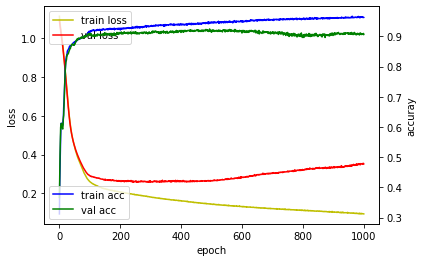

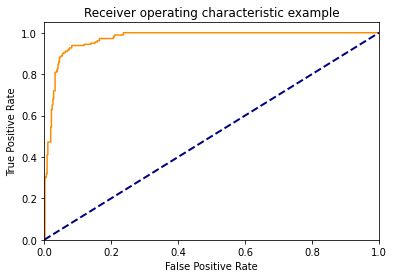


fpr : [0.         0.0021692  0.0021692  0.00433839 0.00433839 0.00650759
 0.00650759 0.00867679 0.00867679 0.01084599 0.01084599 0.01952278
 0.01952278 0.02169197 0.02169197 0.02386117 0.02386117 0.02603037
 0.02603037 0.02819957 0.02819957 0.03253796 0.03253796 0.03687636
 0.03687636 0.03904555 0.03904555 0.04121475 0.04121475 0.04338395
 0.04338395 0.04555315 0.04555315 0.04989154 0.04989154 0.05422993
 0.05422993 0.05856833 0.05856833 0.06290672 0.06290672 0.06941432
 0.06941432 0.07375271 0.07375271 0.07592191 0.07592191 0.0824295
 0.0824295  0.11930586 0.11930586 0.13882863 0.13882863 0.15184382
 0.15184382 0.15835141 0.15835141 0.164859   0.164859   0.20607375
 0.20607375 0.20824295 0.20824295 0.21041215 0.21041215 0.23644252
 0.23644252 0.26247289 0.26681128 0.4989154  0.5032538  0.57483731
 0.5791757  0.61605206 0.62039046 0.62255965 0.63123644 0.66160521
 0.6659436  0.6681128  0.67245119 0.67678959 0.68112798 0.68546638
 0.68980477 0.69197397 0.69631236 0.71366594 0.71800434 

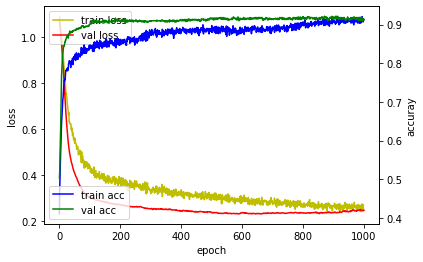

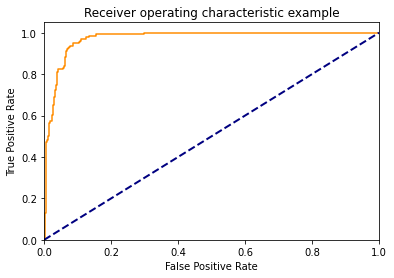


fpr : [0.         0.0021692  0.0021692  0.00433839 0.00433839 0.00650759
 0.00650759 0.00867679 0.00867679 0.01084599 0.01084599 0.01301518
 0.01301518 0.01518438 0.01518438 0.01735358 0.01735358 0.02386117
 0.02386117 0.02603037 0.02603037 0.02819957 0.02819957 0.03036876
 0.03036876 0.03253796 0.03253796 0.03470716 0.03470716 0.03687636
 0.03687636 0.03904555 0.03904555 0.04121475 0.04121475 0.05639913
 0.05639913 0.05856833 0.05856833 0.06073753 0.06073753 0.06290672
 0.06290672 0.06507592 0.06507592 0.06724512 0.06724512 0.07158351
 0.07158351 0.07375271 0.07375271 0.07592191 0.07592191 0.0845987
 0.0845987  0.10412148 0.10412148 0.10629067 0.10629067 0.10845987
 0.10845987 0.12364425 0.12364425 0.13232104 0.13232104 0.15401302
 0.15401302 0.15618221 0.15618221 0.29718004 0.29718004 0.34273319
 0.34707158 0.35140998 0.35574837 0.42733189 0.43167028 0.59652928
 0.60086768 0.78524946 0.78958785 0.81344902 0.81995662 0.82429501
 0.8308026  0.835141   0.84164859 0.84815618 0.85900217 

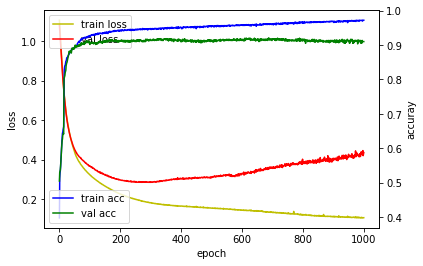

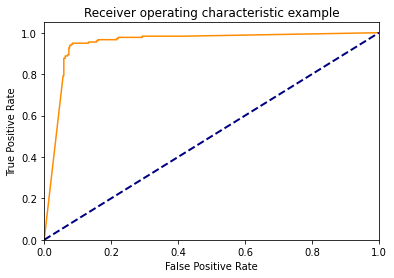


fpr : [0.         0.05639913 0.05856833 0.05856833 0.06290672 0.06290672
 0.06941432 0.06941432 0.07375271 0.07375271 0.07592191 0.07592191
 0.0802603  0.0802603  0.0845987  0.0845987  0.13232104 0.13232104
 0.15618221 0.15618221 0.16052061 0.16052061 0.21691974 0.21691974
 0.22125813 0.22125813 0.22993492 0.23427332 0.24511931 0.2494577
 0.2516269  0.25813449 0.26898048 0.27331887 0.27548807 0.28416486
 0.29284165 0.29284165 0.29501085 0.30802603 0.31236443 0.31453362
 0.31887202 0.329718   0.34273319 0.35357918 0.36225597 0.37527115
 0.41214751 1.        ]

tpr : [0.         0.79213483 0.79213483 0.87640449 0.87640449 0.88764045
 0.88764045 0.89325843 0.89325843 0.92696629 0.92696629 0.93820225
 0.93820225 0.94382022 0.94382022 0.9494382  0.9494382  0.95505618
 0.95505618 0.96067416 0.96067416 0.96629213 0.96629213 0.97191011
 0.97191011 0.97752809 0.97752809 0.97752809 0.97752809 0.97752809
 0.97752809 0.97752809 0.97752809 0.97752809 0.97752809 0.97752809
 0.97752809 0.98314607 0.

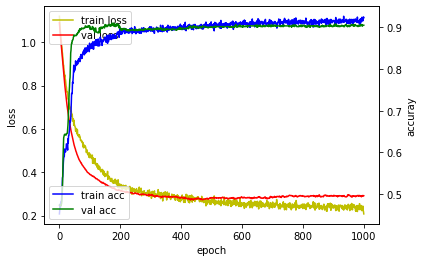

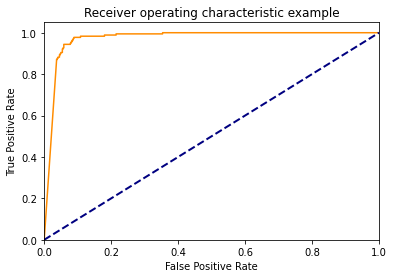


fpr : [0.         0.03687636 0.03687636 0.03904555 0.03904555 0.04121475
 0.04121475 0.04555315 0.04555315 0.04772234 0.04772234 0.04989154
 0.04989154 0.05422993 0.05422993 0.05639913 0.05639913 0.05856833
 0.05856833 0.06290672 0.07809111 0.07809111 0.0802603  0.0802603
 0.0824295  0.0824295  0.0845987  0.0845987  0.0867679  0.0867679
 0.08893709 0.08893709 0.10845987 0.10845987 0.18004338 0.18004338
 0.21475054 0.21475054 0.35357918 0.35357918 0.4143167  0.4186551
 0.46420824 0.46854664 0.4989154  0.5032538  0.51626898 0.52060738
 0.5835141  0.58785249 0.59652928 0.60086768 0.60303688 0.60737527
 0.62255965 0.62689805 0.67678959 0.68112798 0.69197397 0.70065076
 0.70498915 0.70932755 0.71366594 0.71800434 0.72234273 0.72668113
 0.72885033 0.73318872 0.73535792 0.73969631 0.74186551 0.7483731
 0.75488069 0.76355748 0.77223427 0.77657267 0.78741866 0.79175705
 0.79392625 0.80043384 0.80477223 0.83947939 0.84598698 0.85032538
 0.85900217 0.88937093 0.9154013  0.96529284 0.99566161 1. 

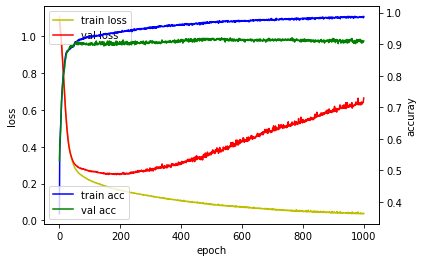

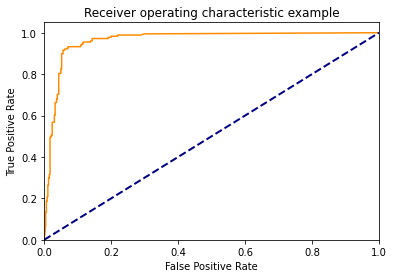


fpr : [0.         0.00433839 0.00433839 0.00433839 0.00433839 0.00433839
 0.00433839 0.00650759 0.00650759 0.00867679 0.00867679 0.01084599
 0.01084599 0.01301518 0.01301518 0.01518438 0.01518438 0.01735358
 0.01735358 0.01952278 0.01952278 0.02169197 0.02169197 0.02386117
 0.02386117 0.03036876 0.03036876 0.03253796 0.03253796 0.03687636
 0.03687636 0.03904555 0.03904555 0.04338395 0.04338395 0.04989154
 0.04989154 0.05206074 0.05206074 0.05639913 0.05639913 0.06073753
 0.06073753 0.06941432 0.06941432 0.07158351 0.07158351 0.10845987
 0.10845987 0.11062907 0.11062907 0.11496746 0.11496746 0.11713666
 0.11713666 0.13882863 0.13882863 0.14316703 0.14316703 0.19088937
 0.19088937 0.19956616 0.19956616 0.21908894 0.21908894 0.24295011
 0.2472885  0.2494577  0.25596529 0.25813449 0.26898048 0.27548807
 0.28850325 0.29934924 1.        ]

tpr : [0.         0.06741573 0.07865169 0.08988764 0.11235955 0.12359551
 0.13483146 0.13483146 0.18539326 0.18539326 0.20786517 0.20786517
 0.26404494 0

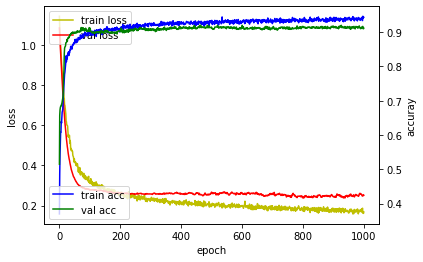

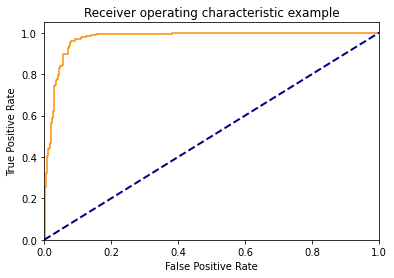


fpr : [0.         0.0021692  0.0021692  0.00433839 0.00433839 0.00650759
 0.00650759 0.00867679 0.00867679 0.01084599 0.01084599 0.01518438
 0.01518438 0.01735358 0.01735358 0.01952278 0.01952278 0.02169197
 0.02169197 0.02386117 0.02386117 0.02603037 0.02603037 0.02819957
 0.02819957 0.03036876 0.03036876 0.03253796 0.03253796 0.03470716
 0.03470716 0.03904555 0.03904555 0.04121475 0.04121475 0.04338395
 0.04338395 0.04555315 0.04555315 0.04772234 0.04772234 0.05206074
 0.05206074 0.05639913 0.05639913 0.07158351 0.07158351 0.07375271
 0.07375271 0.07592191 0.07592191 0.07809111 0.07809111 0.0802603
 0.0802603  0.09327549 0.09327549 0.11062907 0.11062907 0.12364425
 0.12364425 0.14099783 0.14099783 0.15618221 0.15618221 0.36008677
 0.36442516 0.38177874 0.38177874 0.38394794 0.38828633 0.5032538
 0.50759219 0.51409978 0.51843818 0.52060738 0.52494577 0.57266811
 0.57700651 0.5835141  0.58785249 0.67245119 0.67678959 0.68329718
 0.68763557 0.70498915 0.70932755 0.72017354 0.72451193 0

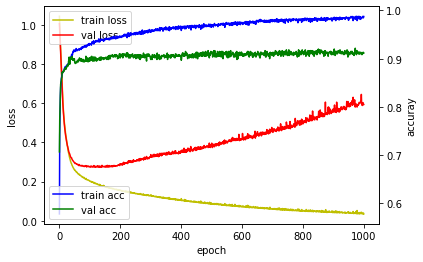

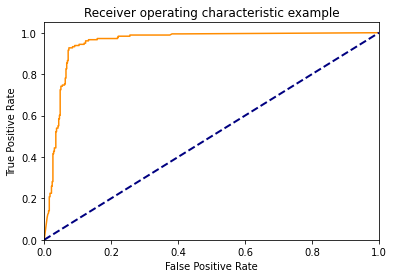


fpr : [0.         0.00867679 0.01084599 0.01301518 0.01301518 0.01518438
 0.01518438 0.01518438 0.01518438 0.01518438 0.01735358 0.01735358
 0.02169197 0.02169197 0.02386117 0.02386117 0.02603037 0.02603037
 0.02819957 0.02819957 0.03036876 0.03036876 0.03470716 0.03470716
 0.03687636 0.03687636 0.04121475 0.04121475 0.04338395 0.04338395
 0.04555315 0.04555315 0.04772234 0.04772234 0.04989154 0.04989154
 0.05422993 0.05422993 0.06073753 0.06073753 0.06290672 0.06290672
 0.06507592 0.06507592 0.06724512 0.06724512 0.06941432 0.06941432
 0.07158351 0.07158351 0.07375271 0.07375271 0.0845987  0.0845987
 0.09110629 0.09110629 0.10412148 0.10412148 0.11930586 0.11930586
 0.12364425 0.12364425 0.13232104 0.13232104 0.15835141 0.15835141
 0.21908894 0.21908894 0.22125813 0.22125813 0.24511931 0.2494577
 0.25596529 0.25596529 0.28633406 0.29067245 0.29284165 0.29934924
 0.30368764 0.30802603 0.31453362 0.32104121 0.32537961 0.3340564
 0.33839479 0.34273319 0.35140998 0.36225597 0.37093275 0.

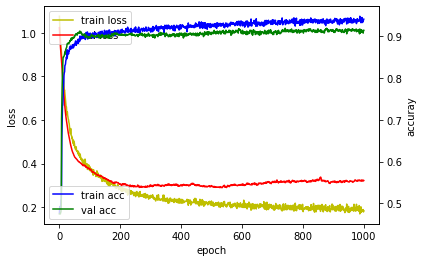

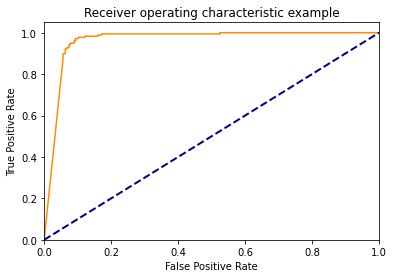


fpr : [0.         0.05639913 0.05639913 0.06290672 0.06290672 0.06724512
 0.06724512 0.07375271 0.07375271 0.07592191 0.07592191 0.07809111
 0.07809111 0.08893709 0.08893709 0.09110629 0.09110629 0.09327549
 0.09327549 0.10195228 0.10195228 0.12147505 0.12147505 0.16052061
 0.16052061 0.17136659 0.17136659 0.40780911 0.41214751 0.42299349
 0.42733189 0.42950108 0.43383948 0.43817787 0.44468547 0.45770065
 0.46203905 0.46420824 0.46854664 0.49023861 0.5032538  0.51193059
 0.51626898 0.51843818 0.52277657 0.52494577 0.52494577 0.54013015
 0.54446855 0.56832972 0.57266811 0.58785249 0.59436009 0.60303688
 0.60954447 0.61388286 0.62039046 0.62472885 0.63340564 0.63991323
 0.64859002 0.65509761 0.65726681 0.670282   0.67895879 0.68112798
 0.69414317 0.70065076 0.70932755 0.72234273 0.72668113 0.74403471
 0.7505423  0.7527115  0.77006508 0.77223427 0.77874187 0.78091106
 0.79392625 0.80477223 0.80911063 0.81561822 0.81995662 0.8308026
 0.83947939 0.84815618 0.87852495 0.88286334 0.89587852 

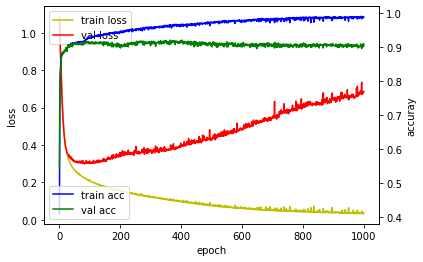

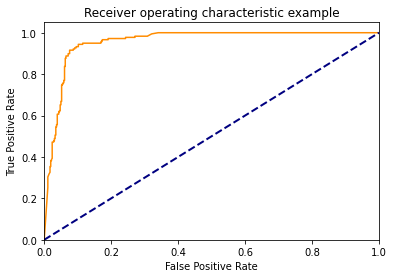


fpr : [0.         0.01084599 0.01084599 0.01084599 0.01084599 0.01084599
 0.01518438 0.01735358 0.01735358 0.01952278 0.01952278 0.02169197
 0.02169197 0.02386117 0.02386117 0.02386117 0.02386117 0.02386117
 0.02386117 0.02819957 0.02819957 0.03036876 0.03036876 0.03253796
 0.03253796 0.03470716 0.03470716 0.03687636 0.03687636 0.03904555
 0.03904555 0.04338395 0.04338395 0.04555315 0.04555315 0.04772234
 0.04772234 0.04989154 0.04989154 0.05206074 0.05206074 0.05422993
 0.05422993 0.05639913 0.05639913 0.05856833 0.05856833 0.06073753
 0.06073753 0.06290672 0.06290672 0.06507592 0.06507592 0.07158351
 0.07158351 0.07592191 0.07592191 0.0867679  0.0867679  0.09110629
 0.09110629 0.09544469 0.09544469 0.10195228 0.10195228 0.11496746
 0.11496746 0.1691974  0.1691974  0.17136659 0.17136659 0.17353579
 0.17353579 0.19088937 0.19088937 0.24295011 0.24295011 0.26464208
 0.26898048 0.27114967 0.27114967 0.27548807 0.28416486 0.29067245
 0.29501085 0.30802603 0.32104121 0.34056399 1.        

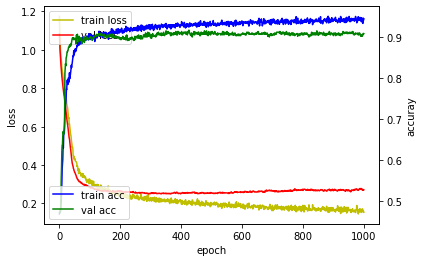

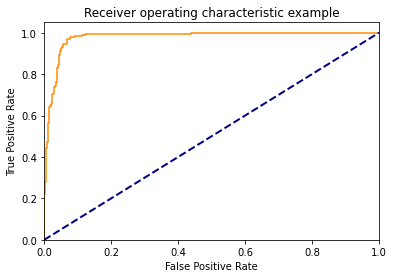


fpr : [0.         0.         0.         0.0021692  0.0021692  0.00433839
 0.00433839 0.00650759 0.00650759 0.00867679 0.00867679 0.01084599
 0.01084599 0.01301518 0.01301518 0.01518438 0.01518438 0.01735358
 0.01735358 0.01952278 0.01952278 0.02169197 0.02169197 0.02386117
 0.02386117 0.02819957 0.02819957 0.03036876 0.03036876 0.03253796
 0.03253796 0.03470716 0.03470716 0.03687636 0.03687636 0.03904555
 0.03904555 0.04121475 0.04121475 0.04555315 0.04555315 0.04772234
 0.04772234 0.04989154 0.04989154 0.05206074 0.05206074 0.05639913
 0.05639913 0.06941432 0.06941432 0.07592191 0.07592191 0.09110629
 0.09110629 0.11279826 0.11279826 0.12147505 0.12147505 0.35357918
 0.35791757 0.37960954 0.38394794 0.43817787 0.43817787 0.46637744
 0.47288503 0.52928416 0.53362256 0.54663774 0.55531453 0.57483731
 0.58785249 0.59652928 0.60086768 0.60303688 0.60737527 0.61171367
 0.61605206 0.62039046 0.62472885 0.63123644 0.63557484 0.64208243
 0.64859002 0.65075922 0.65509761 0.65726681 0.66160521

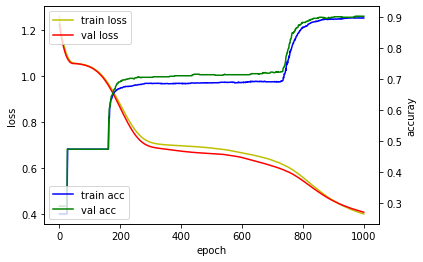

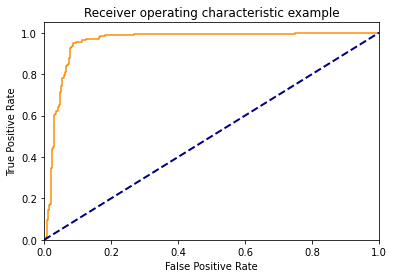


fpr : [0.         0.0021692  0.00650759 0.00650759 0.00867679 0.00867679
 0.01084599 0.01084599 0.01301518 0.01301518 0.01518438 0.01518438
 0.01735358 0.01735358 0.01952278 0.01952278 0.02169197 0.02169197
 0.02386117 0.02386117 0.02603037 0.02603037 0.02819957 0.02819957
 0.03036876 0.03036876 0.03253796 0.03253796 0.03470716 0.03470716
 0.04121475 0.04121475 0.04338395 0.04338395 0.04555315 0.04555315
 0.04772234 0.04772234 0.04989154 0.04989154 0.05206074 0.05206074
 0.05422993 0.05422993 0.05856833 0.05856833 0.06073753 0.06073753
 0.06290672 0.06290672 0.06507592 0.06507592 0.06724512 0.06724512
 0.07158351 0.07158351 0.07375271 0.07375271 0.07592191 0.07592191
 0.07809111 0.07809111 0.0802603  0.0802603  0.0824295  0.0824295
 0.0845987  0.0845987  0.0867679  0.0867679  0.09544469 0.09544469
 0.11279826 0.11279826 0.12581345 0.12581345 0.1626898  0.1626898
 0.1670282  0.1670282  0.18221258 0.18221258 0.26681128 0.26681128
 0.35140998 0.35574837 0.69414317 0.69848156 0.73318872 0

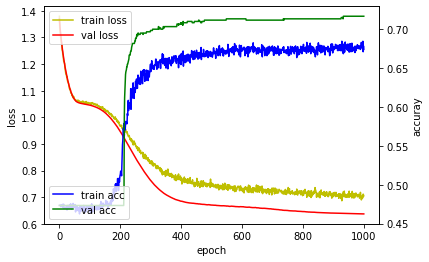

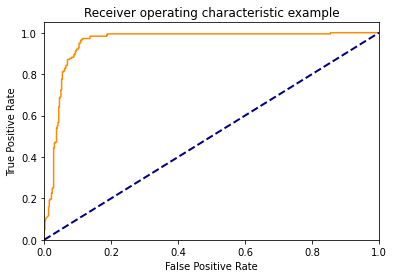


fpr : [0.         0.         0.         0.         0.0021692  0.0021692
 0.0021692  0.0021692  0.00433839 0.00433839 0.00650759 0.01084599
 0.01301518 0.01301518 0.01301518 0.01301518 0.01518438 0.01518438
 0.01518438 0.01518438 0.01735358 0.01735358 0.02169197 0.02169197
 0.02386117 0.02386117 0.02603037 0.02603037 0.02819957 0.02819957
 0.03036876 0.03036876 0.03253796 0.03253796 0.03687636 0.03687636
 0.03904555 0.03904555 0.04121475 0.04121475 0.04338395 0.04338395
 0.04555315 0.04555315 0.04772234 0.04772234 0.04989154 0.04989154
 0.05206074 0.05206074 0.05422993 0.05422993 0.05639913 0.05639913
 0.06073753 0.06073753 0.06290672 0.06290672 0.06507592 0.06507592
 0.06941432 0.06941432 0.07592191 0.07592191 0.0824295  0.0824295
 0.08893709 0.08893709 0.09110629 0.09110629 0.09327549 0.09327549
 0.09544469 0.09544469 0.09761388 0.09761388 0.10195228 0.10195228
 0.10412148 0.10412148 0.10845987 0.10845987 0.11062907 0.11062907
 0.11496746 0.11496746 0.13665944 0.13665944 0.18655098 0

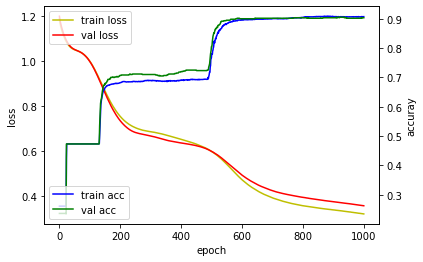

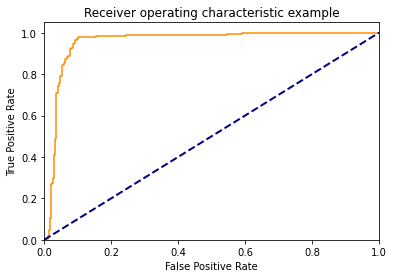


fpr : [0.         0.0021692  0.00650759 0.00650759 0.01084599 0.01084599
 0.01301518 0.01301518 0.01518438 0.01518438 0.01735358 0.01735358
 0.01952278 0.01952278 0.02169197 0.02169197 0.02386117 0.02386117
 0.02603037 0.02603037 0.02819957 0.02819957 0.03036876 0.03036876
 0.03253796 0.03253796 0.03470716 0.03470716 0.04121475 0.04121475
 0.04338395 0.04338395 0.04555315 0.04555315 0.04772234 0.04772234
 0.05206074 0.05206074 0.05856833 0.05856833 0.06073753 0.06073753
 0.06290672 0.06290672 0.06941432 0.06941432 0.07158351 0.07158351
 0.07592191 0.07592191 0.07809111 0.07809111 0.0802603  0.0802603
 0.0845987  0.0845987  0.08893709 0.08893709 0.09110629 0.09110629
 0.09327549 0.09327549 0.09761388 0.09761388 0.09978308 0.09978308
 0.15401302 0.15401302 0.24295011 0.24295011 0.28199566 0.28633406
 0.32537961 0.329718   0.34273319 0.34707158 0.40563991 0.40997831
 0.54663774 0.54663774 0.59219089 0.59219089 0.93492408 0.93926247
 1.        ]

tpr : [0.         0.         0.         0.

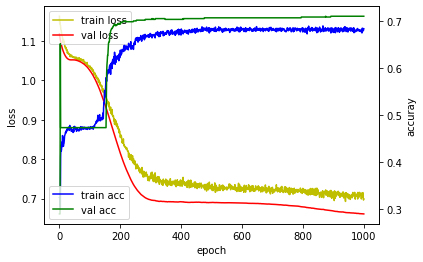

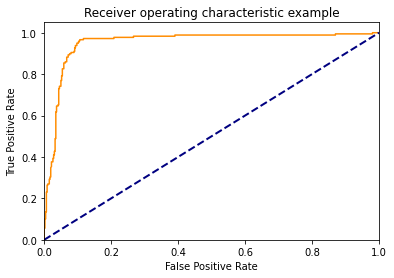


fpr : [0.         0.         0.         0.0021692  0.0021692  0.0021692
 0.0021692  0.0021692  0.00433839 0.00433839 0.00650759 0.00650759
 0.00867679 0.00867679 0.01084599 0.01084599 0.01518438 0.01518438
 0.01735358 0.01735358 0.01952278 0.01952278 0.02169197 0.02169197
 0.02603037 0.02603037 0.02819957 0.02819957 0.03036876 0.03036876
 0.03253796 0.03253796 0.03470716 0.03470716 0.03687636 0.03687636
 0.04121475 0.04121475 0.04338395 0.04338395 0.04555315 0.04555315
 0.04989154 0.04989154 0.05206074 0.05206074 0.05422993 0.05422993
 0.05856833 0.05856833 0.06290672 0.06290672 0.06724512 0.06724512
 0.07158351 0.07158351 0.07592191 0.07592191 0.0802603  0.0802603
 0.08893709 0.08893709 0.09110629 0.09110629 0.09327549 0.09327549
 0.09761388 0.09761388 0.10195228 0.10195228 0.10412148 0.10412148
 0.10629067 0.10629067 0.11713666 0.11713666 0.20824295 0.20824295
 0.26030369 0.26464208 0.26681128 0.26681128 0.32104121 0.32537961
 0.35140998 0.35574837 0.35791757 0.36659436 0.39045553 0

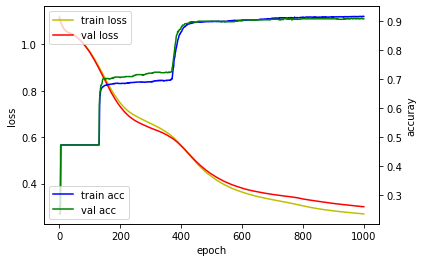

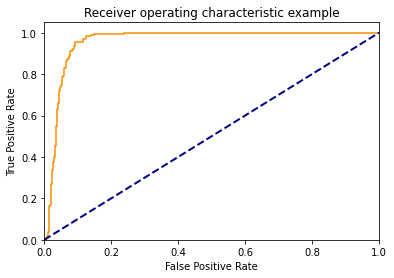


fpr : [0.         0.0021692  0.00650759 0.00650759 0.00867679 0.00867679
 0.01084599 0.01084599 0.01301518 0.01301518 0.01518438 0.01518438
 0.01735358 0.01735358 0.01952278 0.01952278 0.02169197 0.02169197
 0.02386117 0.02386117 0.02603037 0.02603037 0.02819957 0.02819957
 0.03036876 0.03036876 0.03253796 0.03253796 0.03470716 0.03470716
 0.03687636 0.03687636 0.03904555 0.03904555 0.04121475 0.04121475
 0.04338395 0.04338395 0.04555315 0.04555315 0.04772234 0.04772234
 0.04989154 0.04989154 0.05206074 0.05206074 0.05422993 0.05422993
 0.05639913 0.05639913 0.05856833 0.05856833 0.06507592 0.06507592
 0.06941432 0.06941432 0.07375271 0.07375271 0.07592191 0.07592191
 0.0824295  0.0824295  0.0867679  0.0867679  0.08893709 0.08893709
 0.09110629 0.09110629 0.11496746 0.11496746 0.11713666 0.11713666
 0.12364425 0.12364425 0.13882863 0.13882863 0.14750542 0.14750542
 0.23861171 0.23861171 0.31236443 0.31670282 0.4143167  0.4186551
 0.53796095 0.54229935 0.94360087 0.94793926 1.        ]

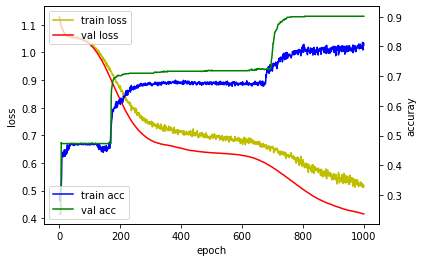

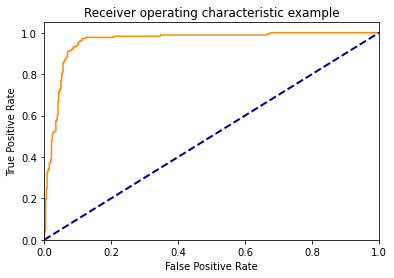


fpr : [0.         0.         0.         0.0021692  0.0021692  0.00433839
 0.00433839 0.00433839 0.00433839 0.00650759 0.00650759 0.00867679
 0.00867679 0.00867679 0.01084599 0.01084599 0.01301518 0.01301518
 0.01518438 0.01518438 0.01952278 0.01952278 0.02169197 0.02169197
 0.02169197 0.02169197 0.02386117 0.02386117 0.02603037 0.02603037
 0.02819957 0.02819957 0.03470716 0.03470716 0.03687636 0.03687636
 0.03904555 0.03904555 0.04121475 0.04121475 0.04338395 0.04338395
 0.04555315 0.04555315 0.04772234 0.04772234 0.04989154 0.04989154
 0.05206074 0.05206074 0.05422993 0.05422993 0.05639913 0.05639913
 0.05856833 0.05856833 0.06073753 0.06073753 0.06507592 0.06507592
 0.06941432 0.06941432 0.07809111 0.07809111 0.0824295  0.0824295
 0.0867679  0.0867679  0.09544469 0.09544469 0.09978308 0.09978308
 0.10195228 0.10195228 0.10629067 0.10629067 0.11279826 0.11279826
 0.12364425 0.12364425 0.20607375 0.20607375 0.21041215 0.21475054
 0.34707158 0.34707158 0.63991323 0.64425163 0.6659436  

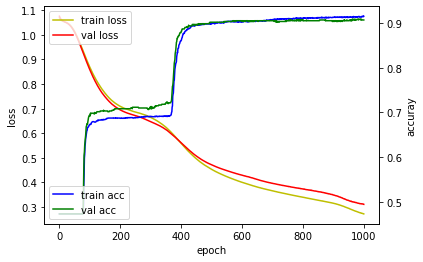

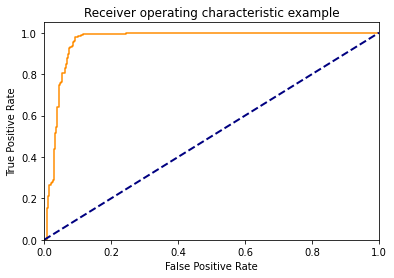


fpr : [0.         0.0021692  0.00867679 0.00867679 0.01084599 0.01084599
 0.01301518 0.01301518 0.01518438 0.01518438 0.01952278 0.01952278
 0.02169197 0.02169197 0.02386117 0.02386117 0.02603037 0.02603037
 0.02819957 0.02819957 0.03036876 0.03036876 0.03253796 0.03253796
 0.03470716 0.03470716 0.03687636 0.03687636 0.03904555 0.03904555
 0.04338395 0.04338395 0.04555315 0.04555315 0.04772234 0.04772234
 0.04989154 0.04989154 0.05206074 0.05206074 0.05422993 0.05422993
 0.06073753 0.06073753 0.06507592 0.06507592 0.06724512 0.06724512
 0.06941432 0.06941432 0.07158351 0.07158351 0.07375271 0.07375271
 0.07809111 0.07809111 0.0824295  0.0824295  0.0845987  0.0845987
 0.0867679  0.0867679  0.08893709 0.08893709 0.09110629 0.09110629
 0.09327549 0.09327549 0.10195228 0.10195228 0.10845987 0.10845987
 0.11713666 0.11713666 0.24295011 0.24295011 0.30585683 0.31019523
 0.45553145 0.45986985 0.61822126 0.62255965 0.86334056 0.86767896
 0.88937093 0.89370933 1.        ]

tpr : [0.         0.

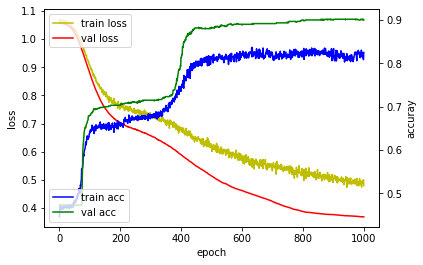

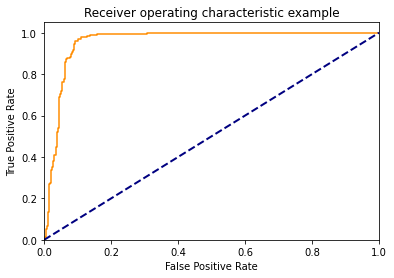


fpr : [0.         0.0021692  0.0021692  0.00433839 0.00433839 0.00650759
 0.00650759 0.00867679 0.00867679 0.01084599 0.01084599 0.01084599
 0.01084599 0.01084599 0.01084599 0.01301518 0.01301518 0.01518438
 0.01518438 0.01735358 0.01735358 0.01952278 0.01952278 0.02169197
 0.02169197 0.02386117 0.02386117 0.02603037 0.02603037 0.02819957
 0.02819957 0.03470716 0.03470716 0.03687636 0.03687636 0.03904555
 0.03904555 0.04121475 0.04121475 0.04338395 0.04338395 0.04555315
 0.04555315 0.04772234 0.04772234 0.04989154 0.04989154 0.05206074
 0.05206074 0.05422993 0.05422993 0.05856833 0.05856833 0.06073753
 0.06073753 0.06290672 0.06290672 0.06507592 0.06507592 0.06724512
 0.06724512 0.07592191 0.07592191 0.0802603  0.0802603  0.0824295
 0.0824295  0.0845987  0.0845987  0.0867679  0.0867679  0.08893709
 0.08893709 0.09327549 0.09327549 0.09978308 0.09978308 0.10845987
 0.10845987 0.12798265 0.12798265 0.13665944 0.13665944 0.15835141
 0.15835141 0.30802603 0.30802603 0.50759219 0.51193059 

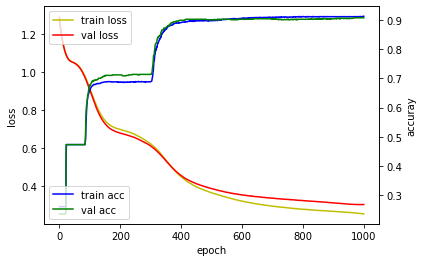

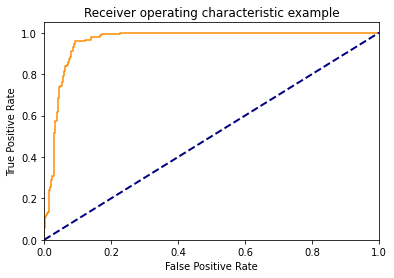


fpr : [0.         0.         0.         0.0021692  0.0021692  0.00650759
 0.00650759 0.00867679 0.00867679 0.01084599 0.01084599 0.01301518
 0.01301518 0.01735358 0.01735358 0.01952278 0.01952278 0.02169197
 0.02169197 0.02386117 0.02386117 0.02819957 0.02819957 0.03036876
 0.03036876 0.03253796 0.03253796 0.03687636 0.03687636 0.03904555
 0.03904555 0.04121475 0.04121475 0.04338395 0.04338395 0.04555315
 0.04555315 0.04772234 0.04772234 0.05206074 0.05206074 0.05422993
 0.05422993 0.05639913 0.05639913 0.05856833 0.05856833 0.06290672
 0.06290672 0.06941432 0.06941432 0.07158351 0.07158351 0.07375271
 0.07375271 0.07809111 0.07809111 0.0802603  0.0802603  0.0845987
 0.0845987  0.0867679  0.0867679  0.08893709 0.08893709 0.09110629
 0.09110629 0.09327549 0.09327549 0.12147505 0.12147505 0.13882863
 0.13882863 0.1670282  0.1670282  0.17136659 0.17136659 0.22776573
 0.22776573 0.32321041 0.32754881 0.39479393 0.39913232 0.52928416
 0.53362256 0.86117137 0.86550976 1.        ]

tpr : [0.

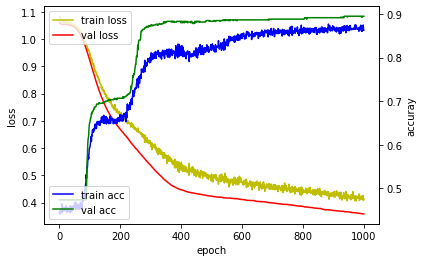

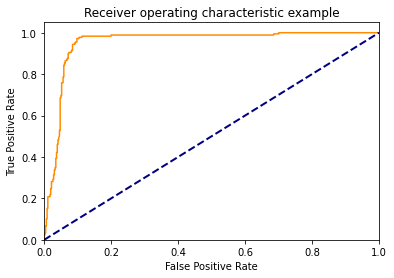


fpr : [0.         0.         0.         0.0021692  0.0021692  0.00433839
 0.00433839 0.00650759 0.00650759 0.00867679 0.00867679 0.01084599
 0.01084599 0.01735358 0.01735358 0.01952278 0.01952278 0.02169197
 0.02169197 0.02603037 0.02603037 0.02819957 0.02819957 0.02819957
 0.03036876 0.03036876 0.03253796 0.03253796 0.03470716 0.03470716
 0.03687636 0.03687636 0.03904555 0.03904555 0.04121475 0.04121475
 0.04338395 0.04338395 0.04555315 0.04555315 0.04772234 0.04772234
 0.04989154 0.04989154 0.05206074 0.05206074 0.05639913 0.05639913
 0.05856833 0.05856833 0.06073753 0.06073753 0.06290672 0.06290672
 0.06724512 0.06724512 0.06941432 0.06941432 0.07158351 0.07158351
 0.07375271 0.07375271 0.0802603  0.0802603  0.0824295  0.0824295
 0.0845987  0.0845987  0.09110629 0.09110629 0.09327549 0.09327549
 0.09761388 0.09761388 0.10412148 0.10412148 0.11279826 0.11279826
 0.19956616 0.19956616 0.39262473 0.39696312 0.54013015 0.54446855
 0.56616052 0.57049892 0.68546638 0.68546638 0.70065076 

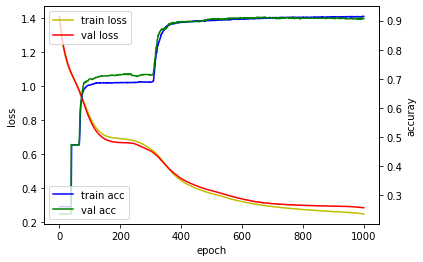

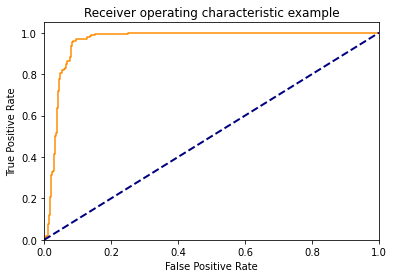


fpr : [0.         0.0021692  0.0021692  0.00650759 0.00650759 0.01084599
 0.01084599 0.01518438 0.01518438 0.01518438 0.01735358 0.01735358
 0.01952278 0.01952278 0.02169197 0.02169197 0.02386117 0.02386117
 0.02603037 0.02603037 0.02819957 0.02819957 0.03036876 0.03036876
 0.03253796 0.03253796 0.03470716 0.03470716 0.03687636 0.03687636
 0.03904555 0.03904555 0.04121475 0.04121475 0.04338395 0.04338395
 0.04555315 0.04555315 0.04772234 0.04772234 0.05206074 0.05206074
 0.05422993 0.05422993 0.05856833 0.05856833 0.06290672 0.06290672
 0.06507592 0.06507592 0.06724512 0.06724512 0.06941432 0.06941432
 0.07592191 0.07592191 0.0802603  0.0802603  0.0824295  0.0824295
 0.0845987  0.0845987  0.09544469 0.09544469 0.12798265 0.12798265
 0.13665944 0.13665944 0.13882863 0.13882863 0.15184382 0.15184382
 0.2516269  0.2516269  0.31019523 0.31453362 0.4208243  0.42516269
 0.47722343 0.48156182 0.88286334 0.88720174 0.93275488 0.94143167
 1.        ]

tpr : [0.         0.         0.01123596 0.

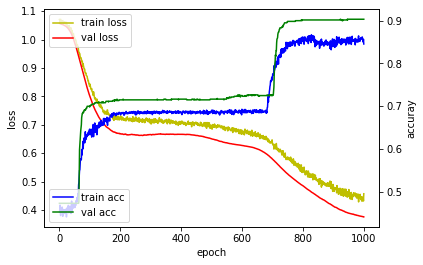

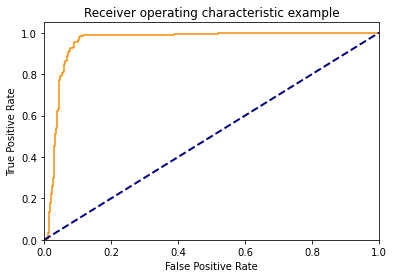


fpr : [0.         0.0021692  0.00867679 0.00867679 0.01084599 0.01084599
 0.01301518 0.01301518 0.01518438 0.01518438 0.01735358 0.01735358
 0.01952278 0.01952278 0.02169197 0.02169197 0.02386117 0.02386117
 0.02603037 0.02603037 0.02819957 0.02819957 0.03036876 0.03036876
 0.03253796 0.03253796 0.03470716 0.03470716 0.03687636 0.03687636
 0.03904555 0.03904555 0.04121475 0.04121475 0.04338395 0.04338395
 0.04555315 0.04555315 0.04772234 0.04772234 0.05206074 0.05206074
 0.05422993 0.05422993 0.05639913 0.05639913 0.05856833 0.05856833
 0.06073753 0.06073753 0.06290672 0.06290672 0.06724512 0.06724512
 0.06941432 0.06941432 0.07158351 0.07158351 0.07375271 0.07375271
 0.07592191 0.07592191 0.0867679  0.0867679  0.08893709 0.08893709
 0.09978308 0.09978308 0.10195228 0.10195228 0.10412148 0.10412148
 0.10629067 0.10629067 0.11713666 0.11713666 0.18438178 0.18872017
 0.38828633 0.38828633 0.45119306 0.45553145 0.48806941 0.49240781
 0.52060738 0.52060738 0.95878525 0.96312364 1.        

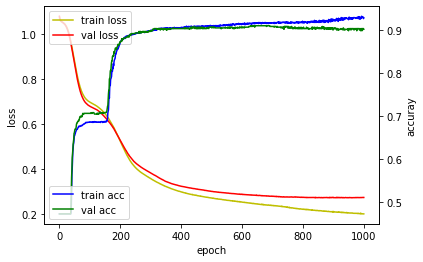

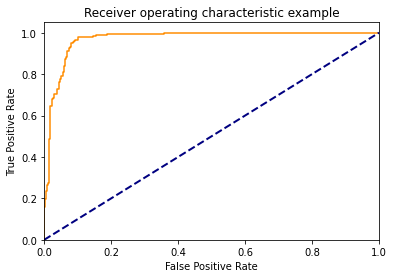


fpr : [0.         0.         0.         0.0021692  0.0021692  0.00433839
 0.00433839 0.00650759 0.00650759 0.00867679 0.00867679 0.01084599
 0.01084599 0.01301518 0.01301518 0.01518438 0.01518438 0.01735358
 0.01735358 0.02386117 0.02386117 0.02603037 0.02603037 0.02819957
 0.02819957 0.03036876 0.03036876 0.03687636 0.03687636 0.03904555
 0.03904555 0.04555315 0.04555315 0.04772234 0.04772234 0.04989154
 0.04989154 0.05639913 0.05639913 0.05856833 0.05856833 0.06073753
 0.06073753 0.06290672 0.06290672 0.06507592 0.06507592 0.06724512
 0.06724512 0.06941432 0.06941432 0.07375271 0.07375271 0.07809111
 0.07809111 0.0802603  0.0802603  0.0867679  0.0867679  0.08893709
 0.08893709 0.09110629 0.09110629 0.10195228 0.10195228 0.14533623
 0.14533623 0.15401302 0.15401302 0.18655098 0.18655098 0.31453362
 0.31887202 0.34490239 0.34924078 0.35791757 0.35791757 0.57049892
 0.57483731 0.94577007 0.95010846 0.95444685 0.95878525 1.        ]

tpr : [0.         0.00561798 0.15730337 0.15730337 0.

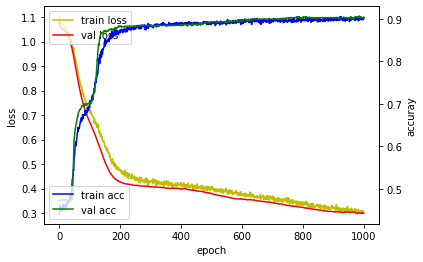

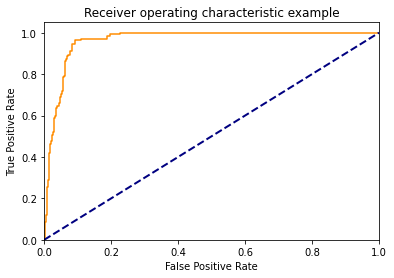


fpr : [0.         0.0021692  0.0021692  0.00433839 0.00433839 0.00867679
 0.00867679 0.01084599 0.01084599 0.01301518 0.01301518 0.01518438
 0.01518438 0.01735358 0.01735358 0.01952278 0.01952278 0.02169197
 0.02169197 0.02386117 0.02386117 0.02603037 0.02603037 0.02819957
 0.02819957 0.03253796 0.03253796 0.03470716 0.03470716 0.03687636
 0.03687636 0.03904555 0.03904555 0.04338395 0.04338395 0.04555315
 0.04555315 0.04772234 0.04772234 0.04989154 0.04989154 0.05206074
 0.05206074 0.05422993 0.05422993 0.05639913 0.05639913 0.05856833
 0.05856833 0.06073753 0.06073753 0.06290672 0.06290672 0.06507592
 0.06507592 0.06724512 0.06724512 0.06941432 0.06941432 0.07158351
 0.07158351 0.07592191 0.07592191 0.0824295  0.0824295  0.09110629
 0.09110629 0.09327549 0.09327549 0.11062907 0.11062907 0.18872017
 0.18872017 0.19739696 0.19739696 0.22559653 0.22559653 0.32321041
 0.32754881 0.40563991 0.40997831 0.6637744  0.6681128  0.94143167
 0.94577007 1.        ]

tpr : [0.         0.         0

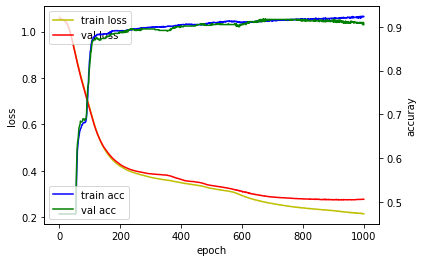

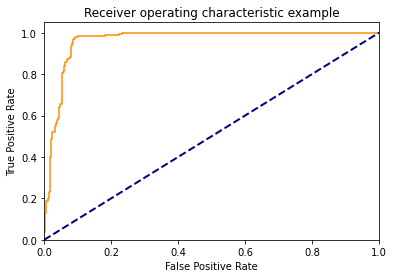


fpr : [0.         0.         0.         0.0021692  0.0021692  0.00433839
 0.00433839 0.00650759 0.00650759 0.01084599 0.01084599 0.01301518
 0.01301518 0.01518438 0.01518438 0.01735358 0.01735358 0.01952278
 0.01952278 0.02169197 0.02169197 0.02386117 0.02386117 0.03253796
 0.03253796 0.03470716 0.03470716 0.03904555 0.03904555 0.04121475
 0.04121475 0.04338395 0.04338395 0.04555315 0.04555315 0.04772234
 0.04772234 0.05206074 0.05206074 0.05422993 0.05422993 0.05639913
 0.05639913 0.05856833 0.05856833 0.06290672 0.06290672 0.06724512
 0.06724512 0.07375271 0.07375271 0.07809111 0.07809111 0.0802603
 0.0802603  0.0824295  0.0824295  0.0845987  0.0845987  0.0867679
 0.0867679  0.09110629 0.09110629 0.10195228 0.10195228 0.18221258
 0.18221258 0.22342733 0.22342733 0.23210412 0.23210412 0.26247289
 0.26681128 0.47288503 0.47722343 0.5856833  0.59002169 0.84164859
 0.84598698 0.9197397  0.92407809 0.95227766 0.95661605 0.99349241
 0.9978308  1.        ]

tpr : [0.         0.00561798 0.0

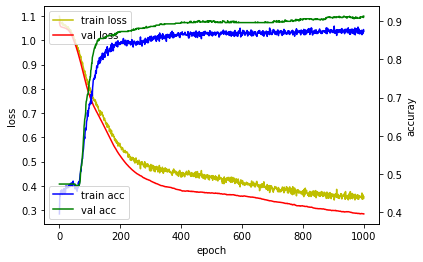

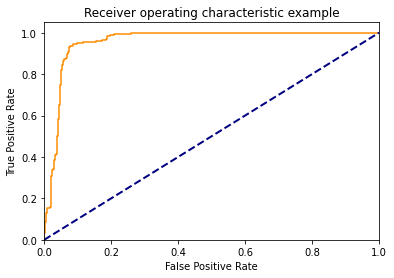


fpr : [0.         0.         0.         0.0021692  0.0021692  0.00433839
 0.00433839 0.00650759 0.00650759 0.00867679 0.00867679 0.01735358
 0.01735358 0.01952278 0.01952278 0.02169197 0.02169197 0.02169197
 0.02169197 0.02386117 0.02386117 0.02386117 0.02603037 0.02603037
 0.02819957 0.02819957 0.03253796 0.03253796 0.03470716 0.03470716
 0.03687636 0.03687636 0.04121475 0.04121475 0.04338395 0.04338395
 0.04555315 0.04555315 0.04772234 0.04772234 0.04989154 0.04989154
 0.04989154 0.04989154 0.05422993 0.05422993 0.05639913 0.05639913
 0.05856833 0.05856833 0.06507592 0.06507592 0.06724512 0.06724512
 0.06941432 0.06941432 0.07158351 0.07158351 0.07375271 0.07375271
 0.07809111 0.07809111 0.0867679  0.0867679  0.09761388 0.09761388
 0.11496746 0.11496746 0.15618221 0.15618221 0.17136659 0.17136659
 0.18438178 0.18438178 0.18655098 0.18655098 0.18872017 0.18872017
 0.19522777 0.19522777 0.20824295 0.20824295 0.25596529 0.26030369
 0.26030369 0.42299349 0.42733189 0.52494577 0.52928416

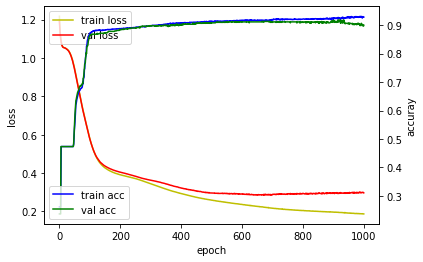

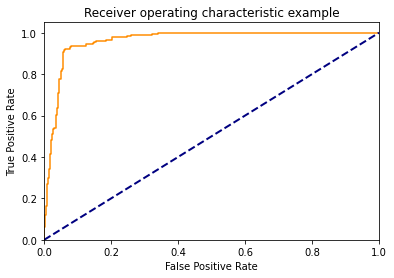


fpr : [0.         0.         0.         0.0021692  0.0021692  0.00433839
 0.00433839 0.00650759 0.00650759 0.00867679 0.00867679 0.01084599
 0.01084599 0.01518438 0.01518438 0.01735358 0.01735358 0.01952278
 0.01952278 0.02169197 0.02169197 0.02386117 0.02386117 0.02603037
 0.02603037 0.02819957 0.02819957 0.03470716 0.03470716 0.03687636
 0.03687636 0.03904555 0.03904555 0.04121475 0.04121475 0.04338395
 0.04338395 0.04555315 0.04555315 0.04989154 0.04989154 0.05422993
 0.05422993 0.05639913 0.05639913 0.05856833 0.05856833 0.06073753
 0.06073753 0.07592191 0.07592191 0.07809111 0.07809111 0.0802603
 0.0802603  0.12581345 0.12581345 0.14533623 0.14533623 0.14967462
 0.14967462 0.15618221 0.15618221 0.18438178 0.18438178 0.20173536
 0.20173536 0.20390456 0.20390456 0.2472885  0.2472885  0.25813449
 0.25813449 0.32104121 0.32104121 0.34056399 0.34056399 0.34707158
 0.35140998 0.43383948 0.43817787 0.57049892 0.57483731 0.69414317
 0.69848156 0.70932755 0.71366594 0.78741866 0.79175705 

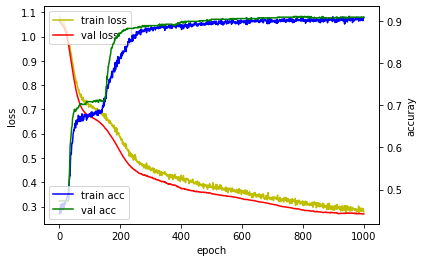

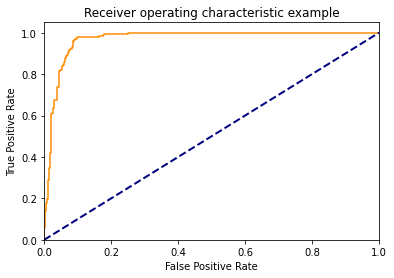


fpr : [0.         0.         0.         0.0021692  0.0021692  0.00433839
 0.00433839 0.00650759 0.00650759 0.00867679 0.00867679 0.01084599
 0.01084599 0.01301518 0.01301518 0.01518438 0.01518438 0.01735358
 0.01735358 0.01952278 0.01952278 0.02386117 0.02386117 0.02603037
 0.02603037 0.02819957 0.02819957 0.03036876 0.03036876 0.03036876
 0.03036876 0.03687636 0.03687636 0.03904555 0.03904555 0.04338395
 0.04338395 0.04555315 0.04555315 0.04772234 0.04772234 0.05206074
 0.05206074 0.05422993 0.05422993 0.05639913 0.05639913 0.05856833
 0.05856833 0.06073753 0.06073753 0.06290672 0.06290672 0.06507592
 0.06507592 0.06941432 0.06941432 0.07158351 0.07158351 0.07375271
 0.07375271 0.07592191 0.07592191 0.0824295  0.0824295  0.0845987
 0.0845987  0.08893709 0.08893709 0.09327549 0.09327549 0.09761388
 0.09761388 0.1626898  0.1626898  0.17570499 0.17570499 0.18004338
 0.18004338 0.2494577  0.2494577  0.30151844 0.30585683 0.32754881
 0.3318872  0.53579176 0.54013015 0.61605206 0.62039046 

In [41]:
import numpy as np

num_epochs = 1000


actiFunc = ['relu', 'sigmoid']
lossFunc = ['categorical_crossentropy']
hidden = [4]
node = [
    [4, 4, 4, 4], [8, 8, 4, 4], [16, 8, 4, 4], [16, 16, 4, 4], [16, 16, 8, 4], [32, 16, 8, 4], [32, 16, 16, 8], [32, 32, 16, 4], [32, 32, 16, 8]
]
batchSize = [512]
dropout = [0, 0.1]

all_acc_histories = []
all_loss_histories = []

for i in range(len(actiFunc)):
    for j in range(len(lossFunc)):
        for k in range(len(hidden)):
            for l in range(len(node)):
                for m in range(len(batchSize)):
                    for n in range(len(dropout)):
                        print('Activation:', actiFunc[i] , '  Loss:', lossFunc[j] , '  HiddenLayer:', hidden[k] , '  Node:[', node[l][0], ',', node[l][1] , ',', node[l][2], ']  BatchSize:', batchSize[m], '  Dropout:', dropout[n])
    
                        model = build_model(actiFunc[i], lossFunc[j], hidden[k], node[l], dropout[n])
                        model.summary()
                        history = model.fit(train_data, train_label, validation_data=(val_data, val_label), epochs=num_epochs, batch_size=batchSize[m], verbose=False)
    
                        acc_history = history.history['val_acc']
                        all_acc_histories.append(acc_history)
                        loss_history = history.history['val_loss']
                        all_loss_histories.append(loss_history)
    
                        print('loss min :', min(loss_history), '  acc max:', max(acc_history))
                        print('loss mean :', np.mean(loss_history), '  acc mean:', np.mean(acc_history))
            
                        fig, loss_ax = plt.subplots()
                        acc_ax = loss_ax.twinx()

                        loss_ax.plot(history.history['loss'], 'y', label='train loss')
                        loss_ax.plot(history.history['val_loss'], 'r', label='val loss')

                        acc_ax.plot(history.history['acc'], 'b', label='train acc')
                        acc_ax.plot(history.history['val_acc'], 'g', label='val acc')

                        loss_ax.set_xlabel('epoch')
                        loss_ax.set_ylabel('loss')
                        acc_ax.set_ylabel('accuray')

                        loss_ax.legend(loc='upper left')
                        acc_ax.legend(loc='lower left')

                        plt.show()
                        
                        
                        y_val_cat_prob = model.predict_proba(test_data)
                        
                        temp_test_data = []
                        temp_test_label = []
                        
                        for x in range(0, len(y_val_cat_prob)):
                            if(np.argmax(y_val_cat_prob[x]) == 2):
                                temp_test_data.append(max(y_val_cat_prob[x]))
                            else:
                                temp_test_data.append(1 - (max(y_val_cat_prob[x])))
        
                            if(testLabel[x] == 2):
                                temp_test_label.append(1)
                            else:
                                temp_test_label.append(0)
                                
                                
                        fpr, tpr, thresholds = roc_curve(temp_test_label, temp_test_data)
                        
                        
                        plt.figure()
                        lw = 2
                        plt.plot(fpr, tpr, color='darkorange')
                        plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')

                        plt.xlim([0.0, 1.0])
                        plt.ylim([0.0, 1.05])

                        plt.xlabel('False Positive Rate')
                        plt.ylabel('True Positive Rate')
                        plt.title('Receiver operating characteristic example')
                        plt.show()
                        
                        print()
                        print('fpr :', fpr)
                        print()
                        print('tpr :', tpr)
                        print()
                        
                        test_loss, test_acc = model.evaluate(test_data,  test_label, verbose=1)
                        print()
                        print('test_acc : ', test_acc)
                        print()
                        
                        pred_data = model.predict(test_data)
                        
                        #print()
                        #print('pred_data : ', pred_data)
                        #print()
                        
                        temp_test_data = []
                        temp_test_label = []
                        
                        for x in range(0, len(pred_data)):
                            if(np.argmax(pred_data[x]) == 2):
                                temp_test_data.append(1)
                            else:
                                temp_test_data.append(0)
        
                            if(testLabel[x] == 2):
                                temp_test_label.append(1)
                            else:
                                temp_test_label.append(0)
                        
                        PP = 0
                        PF = 0
                        FP = 0
                        FF = 0
                        
                        for x in range(0, len(temp_test_data)):
                            if(temp_test_data[x] == 0 and temp_test_label[x] == 0):
                                PP = PP + 1
                            elif(temp_test_data[x] == 0 and temp_test_label[x] == 1):
                                PF = PF + 1
                            elif(temp_test_data[x] == 1 and temp_test_label[x] == 0):
                                FP = FP + 1
                            elif(temp_test_data[x] == 1 and temp_test_label[x] == 1):
                                FF = FF + 1
                        
                        print()
                        print('눈 깜빡임을 눈 깜빡임으로 분류 : ', PP)
                        print('눈 깜빡임을 잡파로 분류 : ', PF)
                        print('잡파를 눈 깜빡임으로 분류 : ', FP)
                        print('잡파를 잡파로 분류 : ', FF)
                        print()
                        
                        print()
                        print()
                        print('=======================================================================================================')
                        print()
                        print()